# Analisis Exploratorio TP1

In [21]:
import numpy as np 
import pandas as pd
import datetime
import seaborn as sns

from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay

import matplotlib.pyplot as plt
%matplotlib inline


from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.graph_objs import *
import plotly.graph_objs as go
import plotly.figure_factory as ff


In [22]:
init_notebook_mode(connected=True)

In [23]:
stations = pd.read_csv("Data/station.csv")
stations.installation_date = pd.to_datetime(stations.installation_date, format='%m/%d/%Y') #Pase a formato datetime las fechas porque es mas comodo


table = ff.create_table(stations)
iplot(table)

La cantidad de estaciones es:

In [4]:
print (str((stations.id.count())))

70


Los nombres de las 70 estaciones son:

In [5]:
print (stations.name.unique())

['San Jose Diridon Caltrain Station' 'San Jose Civic Center'
 'Santa Clara at Almaden' 'Adobe on Almaden' 'San Pedro Square'
 'Paseo de San Antonio' 'San Salvador at 1st' 'Japantown'
 'San Jose City Hall' 'MLK Library' 'SJSU 4th at San Carlos'
 'St James Park' 'Arena Green / SAP Center' 'SJSU - San Salvador at 9th'
 'Franklin at Maple' 'Redwood City Caltrain Station'
 'San Mateo County Center' 'Redwood City Public Library'
 'Stanford in Redwood City' 'Redwood City Medical Center'
 'Mountain View City Hall' 'Mountain View Caltrain Station'
 'San Antonio Caltrain Station' 'Evelyn Park and Ride'
 'San Antonio Shopping Center' 'Castro Street and El Camino Real'
 'Rengstorff Avenue / California Street' 'Palo Alto Caltrain Station'
 'University and Emerson' 'California Ave Caltrain Station'
 'Cowper at University' 'Park at Olive' 'Clay at Battery'
 'Davis at Jackson' 'Commercial at Montgomery' 'Washington at Kearney'
 'Post at Kearney' 'Embarcadero at Vallejo' 'Spear at Folsom'
 'Harry Bridg

Cantidad de "docks" (espacios para estacionar las bicicletas):

In [4]:
print (str(stations.dock_count.sum()))

1236


¿Las estaciones fueron instaladas el mismo día?

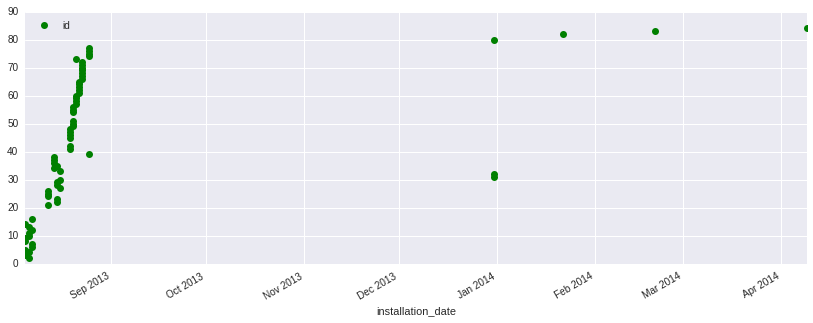

In [6]:
stations.plot(x='installation_date' , y = 'id', style='go',figsize=(14,5))

plt.show()


In [7]:
df = pd.read_csv("Data/trip.csv")

Las duraciones están en segundos, para el análisis conviene pasar a minuto.

In [8]:
df.duration /= 60
df.head()

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
0,4576,1.050000,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127
1,4607,1.166667,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138
2,4130,1.183333,8/29/2013 10:16,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214
3,4251,1.283333,8/29/2013 11:29,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,95060
4,4299,1.383333,8/29/2013 12:02,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103


Verificamos si hay datos nulos:

In [8]:
df.isnull().sum()

id                       0
duration                 0
start_date               0
start_station_name       0
start_station_id         0
end_date                 0
end_station_name         0
end_station_id           0
bike_id                  0
subscription_type        0
zip_code              6619
dtype: int64

Resumen estadístico del dataframe:

In [9]:
df.describe()

,id,duration,start_station_id,end_station_id,bike_id
count,669959.000000,669959.000000,669959.000000,669959.000000,669959.000000
mean,460382.009899,18.465831,57.851876,57.837438,427.587620
std,264584.458487,370.923950,17.112474,17.200142,153.450988
min,4069.000000,1.000000,2.000000,2.000000,9.000000
25%,231082.500000,5.733333,50.000000,50.000000,334.000000
50%,459274.000000,8.616667,62.000000,62.000000,440.000000
75%,692601.000000,12.583333,70.000000,70.000000,546.000000
max,913460.000000,287840.000000,84.000000,84.000000,878.000000


Tenemos un mínimo de 1 minuto, lo que no va a ser considerado como viaje.
y un máximo de 287840 lo que corresponde a 199.9 días.

Por lo tanto vamos a graficar las duraciones por viaje para identificar valores outliers y luego recortar esos datos.

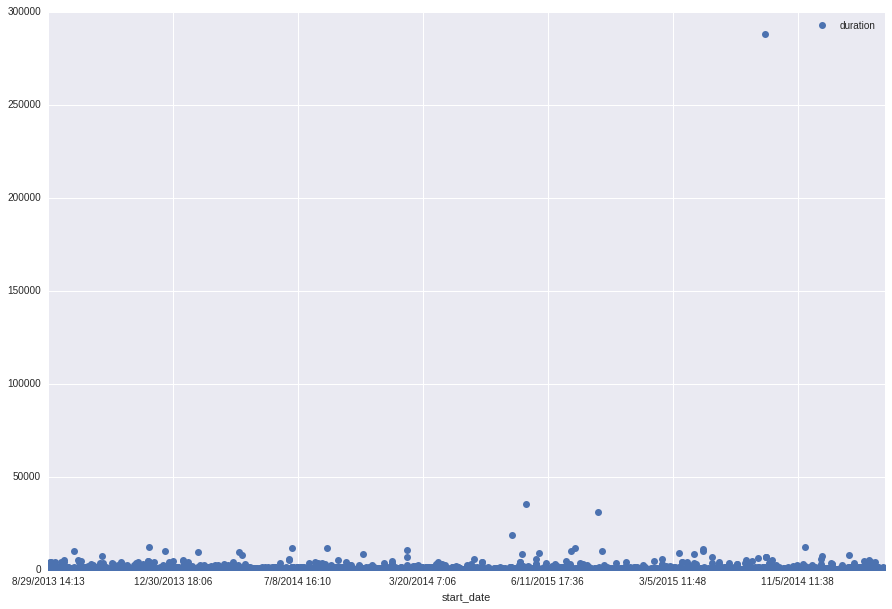

In [9]:
df.plot(x='start_date' , y = 'duration', style='o',figsize=(15,10))

plt.show()

Analizando el gráfico y los valores que se vieron en el resumen estadístico vamos a recortar aquellos viajes cuya duración sea menor a 370 minutos y mayor a 3 minutos.

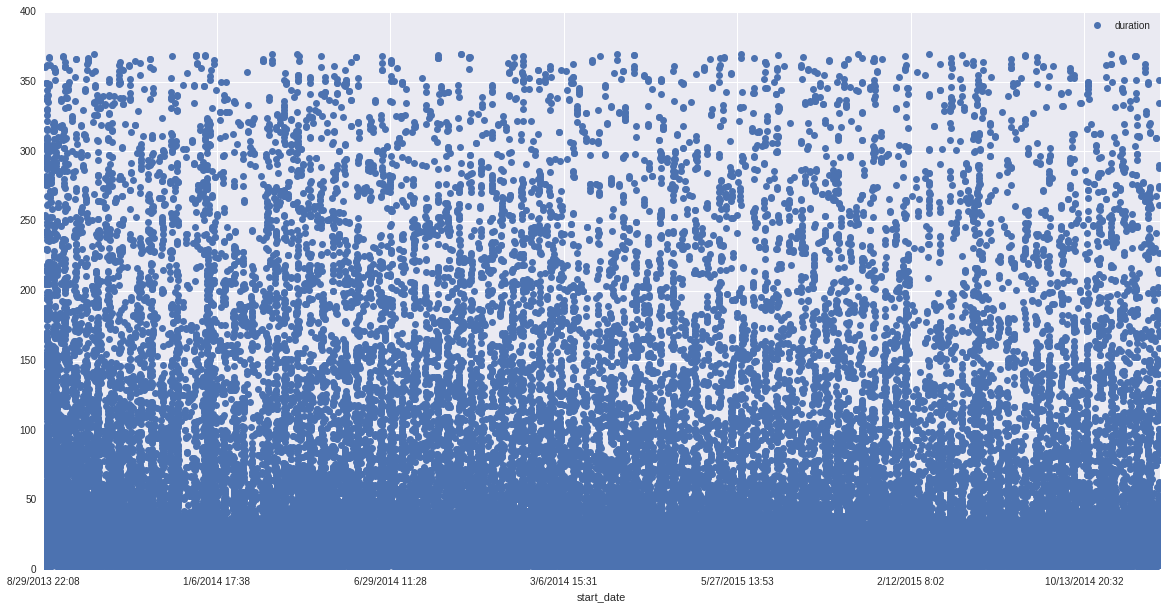

In [10]:
df = df[df.duration <= 370]
df = df[df.duration >3]

df.plot(x='start_date' , y = 'duration', style='o',figsize=(20,10))

plt.show()

Podemos ver una zona muy oscura entre los viajes de duración entre 3 y 50 minutos.

Ahora vamos a analizar la cantidad de viajes contra los distintos días de la semana.

In [11]:
df['weekday'] =  pd.to_datetime(df['start_date']).dt.weekday_name

In [24]:
# df.groupby('weekday').count()['start_date'].sort_values(ascending=False)[0:7].plot(kind='bar',figsize=(14,4));

data = [Bar(x= list(df.groupby('weekday').count()['start_date'].sort_values(ascending=False).index),
            y=list(df.groupby('weekday').count()['start_date'].sort_values(ascending=False)))]
layout = go.Layout(autosize=False,width=600,height=400,
    title='Number of weekday trip'
)

fig = go.Figure(data=data, layout=layout)
iplot(fig,show_link=False)

Vemos que los fines de semana se realiazaron notablemente menor cantidad de viajes.

Podemos ahora analizar la duración promedio de los viajes para cada dia de semana

In [25]:
# df.groupby('weekday').mean()['duration'].sort_values(ascending=False)[0:7].plot(kind='bar',figsize=(14,4));

data = [Bar(x= list(df.groupby('weekday').mean()['duration'].sort_values(ascending=False).index),
            y=list(df.groupby('weekday').mean()['duration'].sort_values(ascending=False)))]
layout = go.Layout(autosize=False,width=600,height=400,
    yaxis=dict(title='Duration'),
    xaxis=dict(title='Weekday')
)

fig = go.Figure(data=data, layout=layout)
iplot(fig,show_link=False)

El último grafico nos muestra claramente que los fines de semana la duración de los viajes es mucho mayor que la de los días de semana.

Ahora analizemos la cantidad de viajes según el mes: 

In [26]:
df['month'] =  pd.to_datetime(df['start_date']).dt.month

In [34]:
#  df.groupby('month').count()['start_date'][0:12].plot(kind='bar',figsize=(13,5));

data = [Bar(x= list(df.groupby('month').count()['start_date'].index),
            y=list(df.groupby('month').count()['start_date']))]
layout = go.Layout(autosize=False,width=800,height=400,
    title='Number of trips by month',
    xaxis=dict(title='month')
)
fig = go.Figure(data=data, layout=layout)
iplot(fig,show_link=False)

Ahora podríamos ver el clima según los meses para comprender mejor los resultados del gráfico anterior

In [35]:
weather = pd.read_csv("Data/weather.csv")
weather['month'] =  pd.to_datetime(weather['date']).dt.month
weather.head()

,date,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,...,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code,month
0,8/29/2013,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,...,10.0,23.0,11.0,28.0,0,4.0,NaN,286.0,94107,8
1,8/30/2013,78.0,69.0,60.0,61.0,58.0,56.0,90.0,70.0,50.0,...,7.0,29.0,13.0,35.0,0,2.0,NaN,291.0,94107,8
2,8/31/2013,71.0,64.0,57.0,57.0,56.0,54.0,93.0,75.0,57.0,...,10.0,26.0,15.0,31.0,0,4.0,NaN,284.0,94107,8
3,9/1/2013,74.0,66.0,58.0,60.0,56.0,53.0,87.0,68.0,49.0,...,10.0,25.0,13.0,29.0,0,4.0,NaN,284.0,94107,9
4,9/2/2013,75.0,69.0,62.0,61.0,60.0,58.0,93.0,77.0,61.0,...,6.0,23.0,12.0,30.0,0,6.0,NaN,277.0,94107,9


In [37]:
# weather.groupby('month').mean()['mean_temperature_f'][0:20].plot(kind='line',style='r',figsize=(15,5));
data = [
    go.Scatter(
        x=list(weather.groupby('month').mean()['mean_temperature_f'].index),
        y=list(weather.groupby('month').mean()['mean_temperature_f'])
    )
]
layout = go.Layout(
    yaxis=dict(title='mean temperature'),
    xaxis=dict(title='month'),
    autosize=False,width=800,height=500,
)
fig = go.Figure(data=data, layout=layout)
iplot(fig,show_link=False)

Vemos que el promedio de temperaturas más altas se registra entre los meses de junio y octubre, lo que coincide con el incremento en la cantidad de viajes en esos meses, de todos modos no explicaría el pico de enero. 
Lo que si podria explicarlo son los dias de vacaciones, pasamos a analizar esto último.

In [ ]:
calendar = USFederalHolidayCalendar()
holidays = calendar.holidays(start=df.start_date.min(), end=df.start_date.max())

# #Find all of the business days in our time span
us_bd = CustomBusinessDay(calendar=USFederalHolidayCalendar())
business_days = pd.DatetimeIndex(start=df.start_date.min(), end=df.start_date.max(), freq=us_bd)

business_days = pd.to_datetime(business_days, format='%Y/%m/%d').date
holidays = pd.to_datetime(holidays, format='%Y/%m/%d').date

# #A 'business_day' or 'holiday' is a date within either of the respected lists.
df['business_day'] = df.start_date.isin(business_days)
df['holiday'] = df.start_date.isin(holidays)


# fig, ax = plt.subplots()

# colors = {False:'red', True:'green'}


# fig.set_size_inches(18, 10)
# plt.scatter(df.id, df.duration, c=df.holiday.map(colors))
# plt.show()




In [41]:
print df.subscription_type.unique()

['Subscriber' 'Customer']


Los subcriptores pagan anualmente el servicio y pueden tomar una bicicleta en cualquier momento.
Los clientes son aquellos que pagan para poder usar el servicio por un tiempo acotado, entre 24 o 72 horas

In [ ]:
subsTrips = df.loc[df.subscription_type=='Subscriber',:]

In [ ]:
customTrips = df.loc[df.subscription_type=='Customer',:]

Analisis de la cantidad de viajes semanales para los subscriptores y cluentes

In [ ]:
trace1 = go.Scatter(x= list(subsTrips.groupby('weekday').count()['start_date'].index),
            y=list(subsTrips.groupby('weekday').count()['start_date'])
                   name = 'Number of Subscribers Trips by Weekday '
                  )
trace2 = go.Scatter(x= list(customTrips.groupby('weekday').count()['start_date'].index),
            y=list(customTrips.groupby('weekday').count()['start_date'])\
                  name = 'Number of Customers Trips by Weekday ')

data = [trace1,trace2]
# fig = dict(data=data)
layout = dict(y=0.5,
        traceorder = 'reversed',
        font = dict(
        size = 16)
        )
    
fig = dict(data=data, layout=layout)    
iplot(fig,show_link=False)


Duracion promedio de los viajes subs vs custom

In [ ]:
trace1 = go.Scatter(x= list(subsTrips.groupby('weekday').count()['duration'].index),
                    y=list(subsTrips.groupby('weekday').count()['duration'])
                    name = 'Subscribers Trips Duration'
                  )
trace2 = go.Scatter(x= list(customTrips.groupby('weekday').count()['start_date'].index),
            y=list(customTrips.groupby('weekday').count()['start_date'])\
                  name = 'Customers Trips Duration')

data = [trace1,trace2]
# fig = dict(data=data)
layout = dict(y=0.5,
        traceorder = 'reversed',
        font = dict(
        size = 16)
        )
    
fig = dict(data=data, layout=layout)    
iplot(fig,show_link=False)

Ver la frecuecia de viajes a lo largo del dia y dependiendo cual dia de la semana.

- cantidad de viajes workday a lo largo de las 24hs del dia
- cantidad de viajes weekend a lo largo de las 24hs del dia

In [ ]:
df.head()

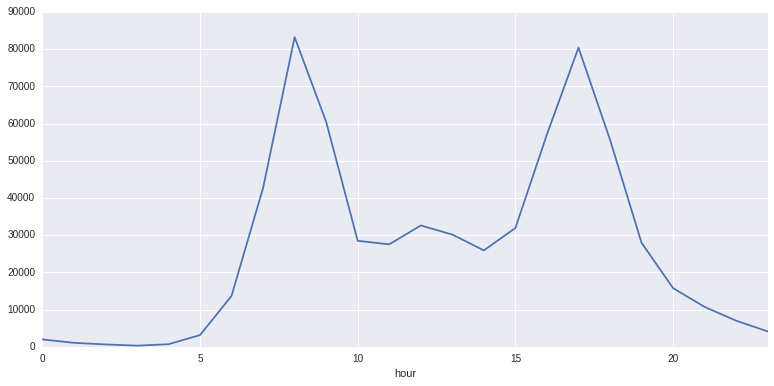

In [7]:
df['hour'] =  pd.to_datetime(df['start_date']).dt.hour
df.groupby('hour').count()['duration'][0:24].plot(kind='line',figsize=(13,6))

# plt.figure()
# df.loc[df.subscription_type.contains('Subscriber'),\
#                  ['','world_rank','year']].groupby('year').mean()\
#                  .loc[:,'world_rank'].plot(rot=90,xticks=range(2011,2016), \
#                  linewidth=2,figsize=(12,8),label='United States');
# timesRanking.loc[timesRanking.country.str.contains('Switzerland'),\
#                  ['university_name','world_rank','year']].groupby('year').mean()\
#                  .loc[:,'world_rank'].plot(rot=90,xticks=range(2011,2016), \
#                  linewidth=2,label='Switzerland');
# plt.legend();

Heat map, showing the same information than before, the darker, the stronger is the relationship. 

IndexError: index 7 is out of bounds for axis 0 with size 7

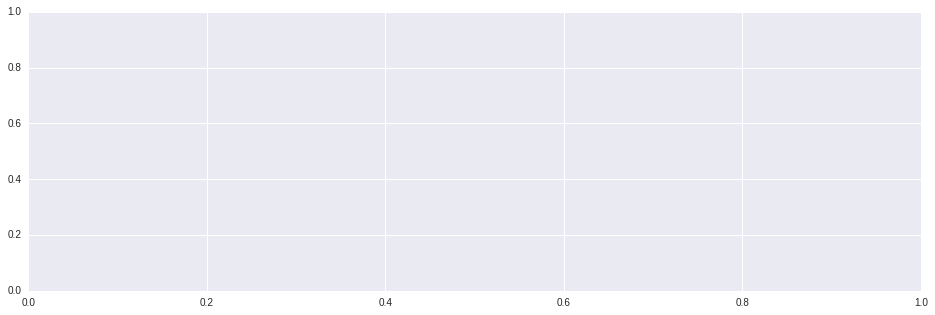

In [27]:
fig, ax = plt.subplots(figsize=(16,5));        # Sample figsize in inches
cor = df.loc[:,['duration','start_station_id','end_station_id','bike_id', 'zip_code','year','month','weekday','hour']]\
        .corr().abs()
cor.values[[np.arange(8)]*2] = 0
sns.heatmap(cor,cmap='Oranges');